<a href="https://colab.research.google.com/github/ikarosgn/DMDP/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **START**

- # **Data Preparation**

In [ ]:
import pandas as pd
import numpy as np

Name		Data Type	Meas.	Description

	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

- ✔️ (1) Set header = None and Set Columns names

In [ ]:
col_name = ['Sex', 'Length',	'Diam',	'Height',	'Whole',	'Shucked',	'Viscera',	'Shell',	'Rings']

In [ ]:
Abalone = pd.read_csv('/content/drive/MyDrive/DPDM65/abalone.data', header = None, names=col_name) # (1) Set header = None  ### ไม่มีชื่อ Cloums / หัวตาราง 
print(Abalone.shape)
Abalone.head()

(4177, 9)


,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Get Dummy

`columns=['Sex']`

In [ ]:
Abalone_pre = pd.get_dummies(Abalone, columns=['Sex'])
Abalone_pre

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


## (2) Set header = 0

- ถ้าให้คำสั่งนี้จะทำให้แถวแรกของตารางโดนตัดทิ้งและกลายเป็นชื่อ Columns ที่เรา Set  ไว้แทน

In [ ]:
col_name = ['Sex', 'Length',	'Diam',	'Height',	'Whole',	'Shucked',	'Viscera',	'Shell',	'Rings']

In [ ]:
Abalone = pd.read_csv('/content/drive/MyDrive/DPDM65/abalone.data', header = 0, names=col_name)   
print(Abalone.shape)
Abalone.head()

(4176, 9)


,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [ ]:
from matplotlib import pyplot as plt

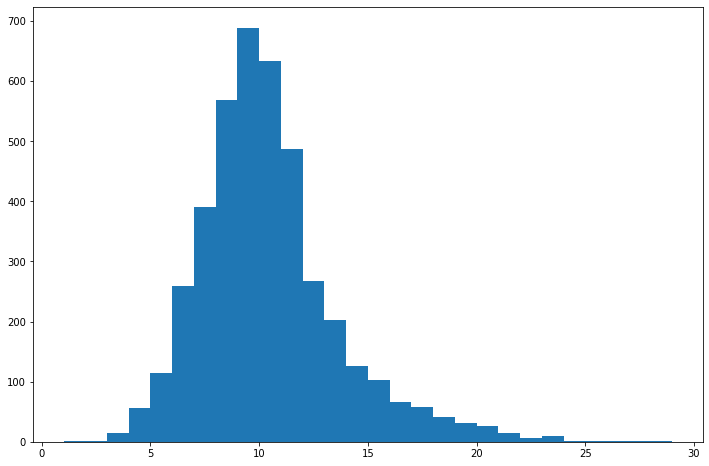

In [ ]:
fig = plt.figure(figsize =(12, 8))

plt.hist(Abalone_pre['Rings'], bins=len(set(Abalone_pre['Rings']))); ##Explore ดูว่าอายุกระจายไปในทิศทางไหน

## Create New Class 

- กำหนดให้อายุ เป็น 2 ช่วง คือ
>- (1) <10 (False)
>- (2) >= 10 (True)

In [ ]:
Abalone_pre['Age_CLASS'] = Abalone_pre['Rings'] >= 10
Abalone_pre

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_F,Sex_I,Sex_M,Age_CLASS
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0,True
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1,False
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0,True


# **เริ่มทำ Data Mining**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
TRAIN = Abalone_pre.iloc[:3133,:]
TEST = Abalone_pre.iloc[3133:,:] 
print(f'train = {TRAIN.shape[0]}, test = {TEST.shape[0]}')

train = 3133, test = 1044


In [ ]:
TRAIN

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_F,Sex_I,Sex_M,Age_CLASS
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3128,0.630,0.495,0.190,1.1655,0.5360,0.2115,0.1625,10,1,0,0,True
3129,0.630,0.490,0.170,1.2155,0.4625,0.2045,0.3105,10,1,0,0,True
3130,0.670,0.515,0.165,1.1735,0.5260,0.2850,0.3160,11,0,0,1,True
3131,0.675,0.505,0.160,1.5320,0.7400,0.3570,0.3815,11,0,0,1,True


In [ ]:
TEST

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_F,Sex_I,Sex_M,Age_CLASS
3133,0.485,0.390,0.100,0.5565,0.2215,0.1155,0.1850,9,1,0,0,False
3134,0.460,0.360,0.125,0.5470,0.2165,0.1105,0.1900,8,0,0,1,False
3135,0.460,0.350,0.125,0.5165,0.1885,0.1145,0.1850,9,0,0,1,False
3136,0.535,0.420,0.125,0.7640,0.3120,0.1505,0.2650,11,0,0,1,True
3137,0.465,0.360,0.105,0.4880,0.1880,0.0845,0.1900,10,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0,True
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1,False
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0,True


In [ ]:
#X_train = Abalone_pre.iloc[:,:8]
X_train = TRAIN.drop(columns=['Age_CLASS', 'Rings'])
X_train

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3128,0.630,0.495,0.190,1.1655,0.5360,0.2115,0.1625,1,0,0
3129,0.630,0.490,0.170,1.2155,0.4625,0.2045,0.3105,1,0,0
3130,0.670,0.515,0.165,1.1735,0.5260,0.2850,0.3160,0,0,1
3131,0.675,0.505,0.160,1.5320,0.7400,0.3570,0.3815,0,0,1


In [ ]:
#y_train = TRAIN.iloc[:,9:]
y_train = TRAIN['Age_CLASS']
y_train

0        True
1       False
2       False
3        True
4       False
        ...  
3128     True
3129     True
3130     True
3131     True
3132     True
Name: Age_CLASS, Length: 3133, dtype: bool

In [ ]:
#X_test = TEST.iloc[:,:8]
X_test = TEST.drop(columns=['Age_CLASS', 'Rings'])
#y_test = TEST.iloc[:,9:]
y_test = TEST['Age_CLASS']

In [ ]:
X_test

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Sex_F,Sex_I,Sex_M
3133,0.485,0.390,0.100,0.5565,0.2215,0.1155,0.1850,1,0,0
3134,0.460,0.360,0.125,0.5470,0.2165,0.1105,0.1900,0,0,1
3135,0.460,0.350,0.125,0.5165,0.1885,0.1145,0.1850,0,0,1
3136,0.535,0.420,0.125,0.7640,0.3120,0.1505,0.2650,0,0,1
3137,0.465,0.360,0.105,0.4880,0.1880,0.0845,0.1900,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [ ]:
y_test

3133    False
3134    False
3135    False
3136     True
3137     True
        ...  
4172     True
4173     True
4174    False
4175     True
4176     True
Name: Age_CLASS, Length: 1044, dtype: bool

## 1. Decision Tree (General)

### Import

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [ ]:
Dtree1 = DecisionTreeClassifier(random_state=0)

### Build model (fit)

In [ ]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Test

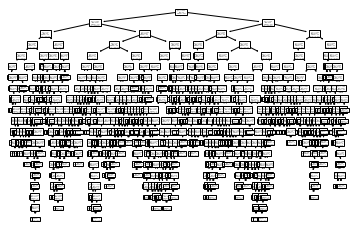

In [ ]:
from sklearn import tree
tree.plot_tree(Dtree1);

In [ ]:
Dtree1.predict(X_test)

array([ True,  True,  True, ...,  True, False,  True])

In [ ]:
 from sklearn.metrics import accuracy_score

accuracy_score(y_test, Dtree1.predict(X_test))

0.7097701149425287

## ลองสร้างต้นไม้แบบคนมีความรู้

`class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)`

In [ ]:
#inport
from sklearn.tree import DecisionTreeClassifier
#Define  ##ให้ต้นไม้โตได้แค่ 6 ชั้น , max_depth = 6
Dtree2 = DecisionTreeClassifier(random_state=0, max_depth=6)
#fit 
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

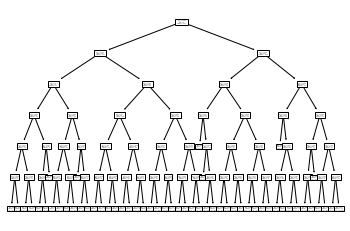

In [ ]:
from sklearn import tree

##Explore
tree.plot_tree(Dtree2);

In [ ]:
 from sklearn.metrics import accuracy_score

accuracy_score(y_test, Dtree2.predict(X_test))

0.7710727969348659

## HW 3 

- สร้าง Tree model แข่งกัน ให้แม่นที่สุด (แม่นกว่าแบบนี้) คนนั้นจะได้คะแนนเต็ม 


# 🔆 **Experiment**

### Hyper-parameter tuning

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
Dtree3 = DecisionTreeClassifier(random_state=0)

### Tuning Parameters ที่มีใน  `sklearn.tree.DecisionTreeClassifier`

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"splitter":["best","random"],
          'max_depth': np.linspace(1, 7, 7, endpoint=True),
          'min_samples_leaf':  np.linspace(0.1, 0.5, 5, endpoint=True),
          'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
          'criterion': ["gini", "entropy"]}

In [ ]:
tuning_model1 =  GridSearchCV(estimator=Dtree3, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=3, scoring = "accuracy")

In [ ]:
#tuning_model

In [ ]:
%%time
tuning_model1.fit(X_train,y_train)

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
CPU times: user 5.17 s, sys: 87.3 ms, total: 5.26 s
Wall time: 15.4 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1., 2., 3., 4., 5., 6., 7.]),
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
score_df = pd.DataFrame(tuning_model.cv_results_)
#score_df.head()
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
46,0.008415,0.000142,0.002110,0.000103,5.0,7,"{'max_depth': 5.0, 'max_features': 7}",0.830941,0.768740,0.724083,0.773163,0.758786,0.771143,0.034505,1
47,0.008837,0.000168,0.002056,0.000086,5.0,8,"{'max_depth': 5.0, 'max_features': 8}",0.845295,0.730463,0.724083,0.790735,0.760383,0.770192,0.044414,2
39,0.008582,0.000099,0.001898,0.000077,4.0,None,"{'max_depth': 4.0, 'max_features': None}",0.827751,0.763955,0.727273,0.787540,0.736422,0.768588,0.036394,3
45,0.007428,0.000122,0.001889,0.000097,5.0,6,"{'max_depth': 5.0, 'max_features': 6}",0.824561,0.752791,0.720893,0.789137,0.744409,0.766358,0.036440,4
38,0.008228,0.000175,0.001956,0.000116,4.0,9,"{'max_depth': 4.0, 'max_features': 9}",0.827751,0.735247,0.732057,0.787540,0.742812,0.765081,0.037171,5


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
tuning_model1.best_estimator_

DecisionTreeClassifier(max_depth=1.0, min_samples_leaf=0.1,
                       min_samples_split=0.1, random_state=0,
                       splitter='random')

In [ ]:
dt_best1 = tuning_model1.best_estimator_

In [ ]:
evaluate_model(dt_best1)

Train Accuracy : 0.7612511969358442
Train Confusion Matrix:
[[1257  341]
 [ 407 1128]]
--------------------------------------------------
Test Accuracy : 0.7452107279693486
Test Confusion Matrix:
[[382 116]
 [150 396]]


In [ ]:
# tuned_hyper_model1 = DecisionTreeClassifier(random_state=0, max_depth=1.0, min_samples_leaf=0.1,
#                                                min_samples_split=0.1, splitter='random')

In [ ]:
# #fit 
# tuned_hyper_model1.fit(X_train,y_train)

In [ ]:
# evaluate_model(tuned_hyper_model1)

#### Tuning parameter แต่ละตัว ดูว่าส่งผลกระทบกับ Model ยังไงบ้าง
- ใช้ AUC (Area Under Curve) เป็นตัวชี้วัดการประเมิน

#### 1. max_depth

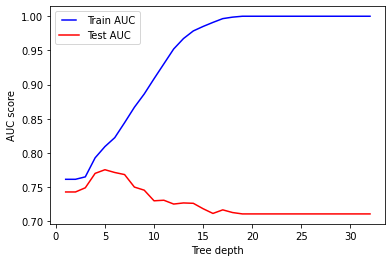

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
   dt.fit(X_train,y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

- Model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

In [ ]:
max_value = max(test_results)
max_index = test_results.index(max_value)
print(f"Accuracy: {max_value}")
#max_index
max_depths_ = max_depths[max_index]
print(f"max_depths: {max_depths_}")

Accuracy: 0.7752989981905644
max_depths: 5.0


#### 2. min_samples_split

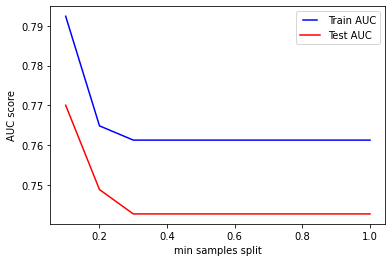

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=0)
   dt.fit(X_train,y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

- when we consider 100% of the samples at each node, the model cannot learn enough about the data. This is an underfitting case.

In [ ]:
max_value = max(test_results)
max_index = test_results.index(max_value)
print(f"Accuracy: {max_value}")
#max_index
min_samples = min_samples_splits[max_index]
print(f"min samples split: {min_samples}")

Accuracy: 0.7700472218544507
min samples split: 0.1


In [ ]:
np.linspace(0.1, 1.0, 10, endpoint=True)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

#### 3. min_samples_leaf

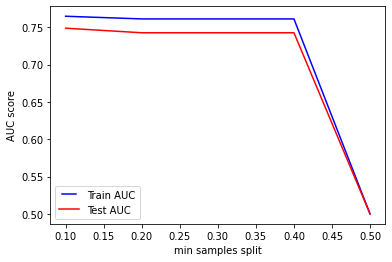

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=0)
   dt.fit(X_train,y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

 - Increasing this value may cause underfitting.

In [ ]:
max_value = max(test_results)
max_index = test_results.index(max_value)
print(f"Accuracy: {max_value}")
#max_index
min_samples_leafs_ = min_samples_leafs[max_index]
print(f"min samples leafs: {min_samples_leafs_}")

Accuracy: 0.7488525530694206
min samples leafs: 0.1


#### 4. max_features

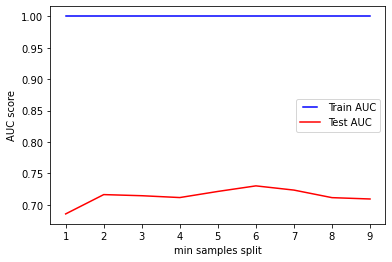

In [ ]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature, random_state=0)
   dt.fit(X_train,y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

- Overfitting case. It’s unexpected to get overfitting for all values of max_features. 

In [ ]:
max_value = max(test_results)
max_index = test_results.index(max_value)
print(f"Accuracy: {max_value}")
#max_index
max_features_ = max_features[max_index]
print(f"min samples leafs: {max_features_}")

Accuracy: 0.7302837724524472
min samples leafs: 6


## 🐼 Hyper-parameter tuning

- Set parameter ทีละตัว

#### Controlling the depth of the tree = 5

In [ ]:
Dtree3_5 = DecisionTreeClassifier(random_state=0, max_depth=5)
#fit 
Dtree3_5.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
evaluate_model(Dtree3_5)

Train Accuracy : 0.8094478135971912
Train Confusion Matrix:
[[1312  286]
 [ 311 1224]]
--------------------------------------------------
Test Accuracy : 0.7758620689655172
Test Confusion Matrix:
[[380 118]
 [116 430]]


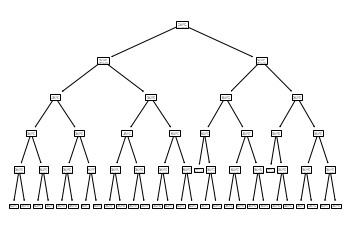

In [ ]:
tree.plot_tree(Dtree3_5);

#### **Hyperparameter Tuning**

- Set parameter 4 ตัว

```
- max_depth
- min_samples_leaf
- min_samples_split
- max_features
```



In [ ]:
n = [None]
max_feature = list(range(1,X_train.shape[1]))
max_feature = max_feature+n

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': np.linspace(1, 32, 32, endpoint=True),
          'min_samples_leaf':  np.linspace(0.1, 0.5, 5, endpoint=True),
          'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
          'max_features': max_feature}

In [ ]:
tuning_model2 =  GridSearchCV(estimator=Dtree3, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=3, scoring = "accuracy")

In [ ]:
%%time
tuning_model2.fit(X_train,y_train)

Fitting 5 folds for each of 16000 candidates, totalling 80000 fits
CPU times: user 55.6 s, sys: 833 ms, total: 56.5 s
Wall time: 2min 38s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, None],
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='accuracy', verbose=3)

In [ ]:
score_df = pd.DataFrame(tuning_model2.cv_results_)
#score_df.head()
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1550,0.004056,0.000066,0.002115,0.000055,4.0,2,0.1,0.1,"{'max_depth': 4.0, 'max_features': 2, 'min_sam...",0.787879,0.738437,0.746411,0.747604,0.728435,0.749753,0.020258,1
1551,0.004030,0.000041,0.002091,0.000083,4.0,2,0.1,0.2,"{'max_depth': 4.0, 'max_features': 2, 'min_sam...",0.787879,0.738437,0.746411,0.747604,0.728435,0.749753,0.020258,1
2050,0.005528,0.003869,0.001780,0.000033,5.0,2,0.1,0.1,"{'max_depth': 5.0, 'max_features': 2, 'min_sam...",0.787879,0.738437,0.746411,0.747604,0.728435,0.749753,0.020258,1
2051,0.003742,0.000067,0.001765,0.000026,5.0,2,0.1,0.2,"{'max_depth': 5.0, 'max_features': 2, 'min_sam...",0.787879,0.738437,0.746411,0.747604,0.728435,0.749753,0.020258,1
2550,0.004280,0.000542,0.002040,0.000035,6.0,2,0.1,0.1,"{'max_depth': 6.0, 'max_features': 2, 'min_sam...",0.787879,0.738437,0.746411,0.747604,0.728435,0.749753,0.020258,1


In [ ]:
tuning_model2.best_estimator_

DecisionTreeClassifier(max_depth=4.0, max_features=2, min_samples_leaf=0.1,
                       min_samples_split=0.1, random_state=0)

In [ ]:
dt_best2 = tuning_model2.best_estimator_
evaluate_model(dt_best2)

Train Accuracy : 0.7577401851260772
Train Confusion Matrix:
[[1077  521]
 [ 238 1297]]
--------------------------------------------------
Test Accuracy : 0.7547892720306514
Test Confusion Matrix:
[[332 166]
 [ 90 456]]


#### Hyperparameter Tuning


- Set parameter 2 ตัว


```
- max_depth
- max_features
```



In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': np.linspace(1, 32, 32, endpoint=True),
          'max_features': max_feature}

tuning_model3 =  GridSearchCV(estimator=Dtree3, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=3, scoring = "accuracy")

In [ ]:
%%time
tuning_model3.fit(X_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
CPU times: user 1.37 s, sys: 23.3 ms, total: 1.39 s
Wall time: 6.25 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]},
             scoring='accuracy', verbose=3)

In [ ]:
score_df = pd.DataFrame(tuning_model3.cv_results_)
#score_df.head()
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
46,0.008853,0.000536,0.002017,0.000161,5.0,7,"{'max_depth': 5.0, 'max_features': 7}",0.830941,0.768740,0.724083,0.773163,0.758786,0.771143,0.034505,1
47,0.008856,0.000212,0.001960,0.000076,5.0,8,"{'max_depth': 5.0, 'max_features': 8}",0.845295,0.730463,0.724083,0.790735,0.760383,0.770192,0.044414,2
39,0.009834,0.001738,0.002359,0.000640,4.0,None,"{'max_depth': 4.0, 'max_features': None}",0.827751,0.763955,0.727273,0.787540,0.736422,0.768588,0.036394,3
45,0.010119,0.002688,0.002944,0.001732,5.0,6,"{'max_depth': 5.0, 'max_features': 6}",0.824561,0.752791,0.720893,0.789137,0.744409,0.766358,0.036440,4
38,0.009202,0.001712,0.002049,0.000065,4.0,9,"{'max_depth': 4.0, 'max_features': 9}",0.827751,0.735247,0.732057,0.787540,0.742812,0.765081,0.037171,5


In [ ]:
tuning_model3.best_estimator_

DecisionTreeClassifier(max_depth=5.0, max_features=7, random_state=0)

In [ ]:
dt_best3 = tuning_model3.best_estimator_
evaluate_model(dt_best3)

Train Accuracy : 0.7906160229811682
Train Confusion Matrix:
[[1224  374]
 [ 282 1253]]
--------------------------------------------------
Test Accuracy : 0.7931034482758621
Test Confusion Matrix:
[[373 125]
 [ 91 455]]


#### Training Decision Tree With Best Hyperparameters

- จากการทดลอง Set parameter 2 ตัว จะได้ parameter ที่ดีที่สุด คือ 


```
DecisionTreeClassifier(max_depth=5.0, max_features=7, random_state=0)
```



In [ ]:
Dtree4 = DecisionTreeClassifier(max_depth=5.0, max_features=7, random_state=0)

In [ ]:
# #fit 
Dtree4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5.0, max_features=7, random_state=0)

In [ ]:
evaluate_model(Dtree4)

Train Accuracy : 0.7906160229811682
Train Confusion Matrix:
[[1224  374]
 [ 282 1253]]
--------------------------------------------------
Test Accuracy : 0.7931034482758621
Test Confusion Matrix:
[[373 125]
 [ 91 455]]


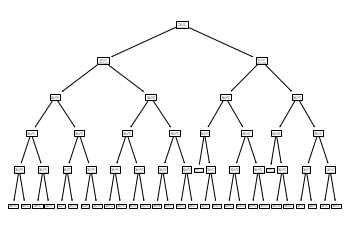

In [ ]:
from sklearn import tree

##Explore
tree.plot_tree(Dtree4);

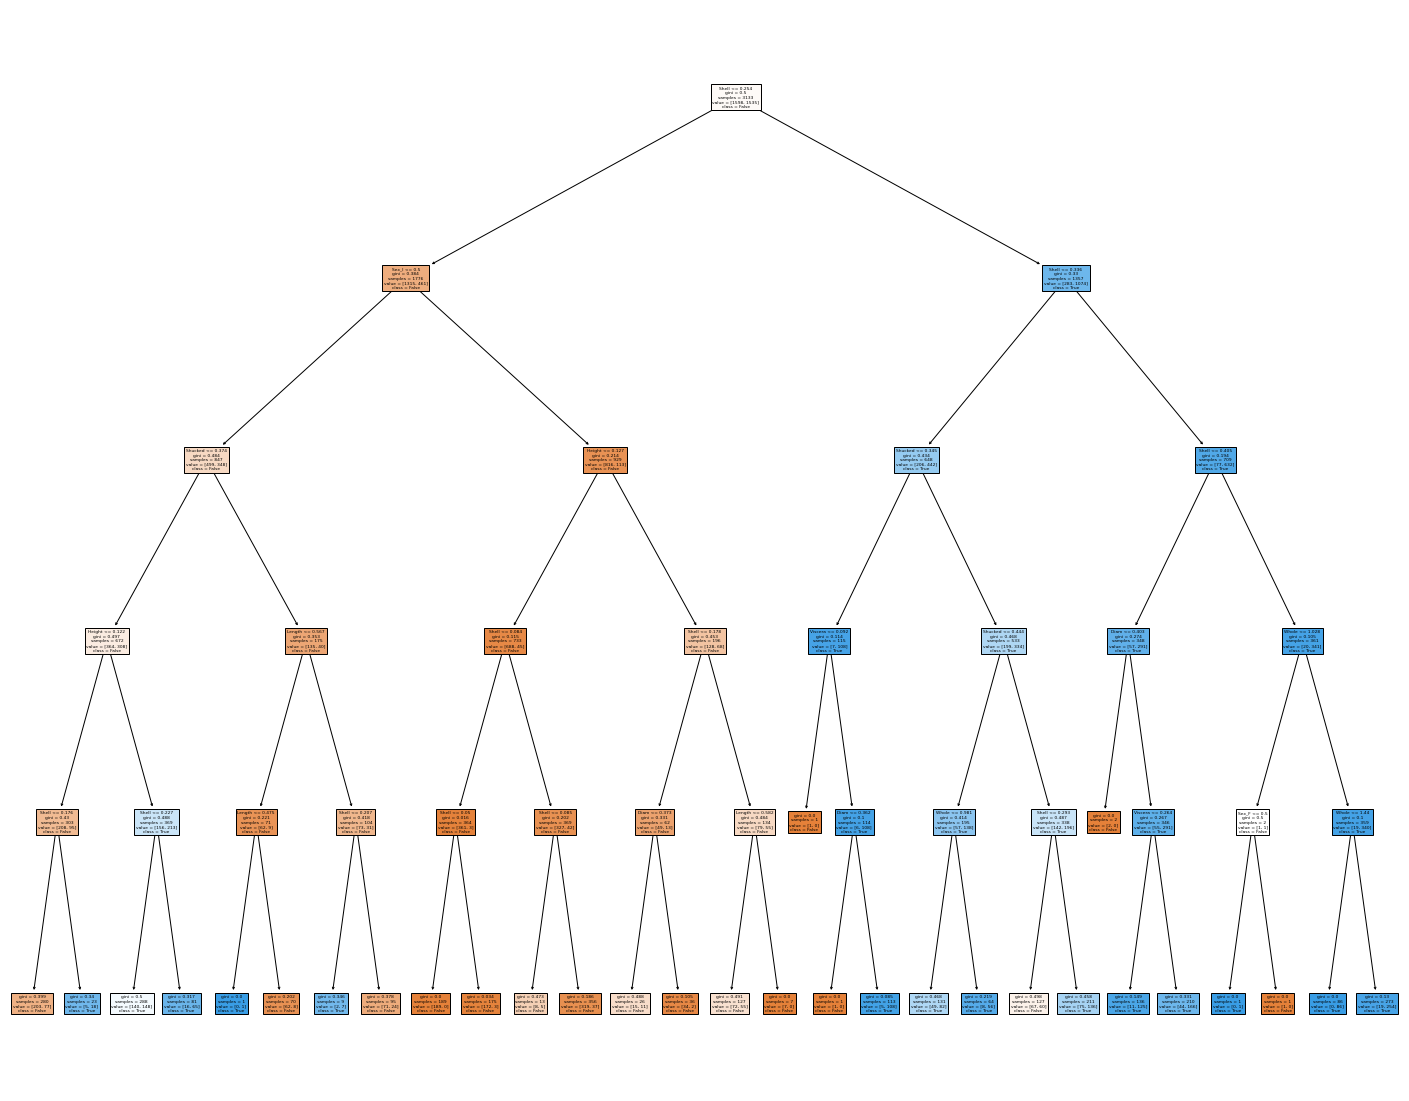

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Dtree4,
                   feature_names=X_train.columns,
                   class_names=['False', "True"],
                   filled=True)

#### 💜 Best Hyperparameters 

`(max_depth=5.0, max_features=7, random_state=0)`

- Test Accuracy : 0.7931034482758621

-----------------------------------

*🍓เรียนวันที่ 19/10/65*

# ทำ Cross Validation หา Model ที่ดีที่สุด

## ข้อมูลสำหรับ Train

In [ ]:
X_train

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3128,0.630,0.495,0.190,1.1655,0.5360,0.2115,0.1625,1,0,0
3129,0.630,0.490,0.170,1.2155,0.4625,0.2045,0.3105,1,0,0
3130,0.670,0.515,0.165,1.1735,0.5260,0.2850,0.3160,0,0,1
3131,0.675,0.505,0.160,1.5320,0.7400,0.3570,0.3815,0,0,1


In [ ]:
y_train

0        True
1       False
2       False
3        True
4       False
        ...  
3128     True
3129     True
3130     True
3131     True
3132     True
Name: Age_CLASS, Length: 3133, dtype: bool

## ข้อมูลสำหรับ Test

In [ ]:
X_test

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Sex_F,Sex_I,Sex_M
3133,0.485,0.390,0.100,0.5565,0.2215,0.1155,0.1850,1,0,0
3134,0.460,0.360,0.125,0.5470,0.2165,0.1105,0.1900,0,0,1
3135,0.460,0.350,0.125,0.5165,0.1885,0.1145,0.1850,0,0,1
3136,0.535,0.420,0.125,0.7640,0.3120,0.1505,0.2650,0,0,1
3137,0.465,0.360,0.105,0.4880,0.1880,0.0845,0.1900,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [ ]:
y_test

3133    False
3134    False
3135    False
3136     True
3137     True
        ...  
4172     True
4173     True
4174    False
4175     True
4176     True
Name: Age_CLASS, Length: 1044, dtype: bool

## Split Training Data

### ทำ 5-fold cross Validation

- เปรียบเทียบ 3 Models 

- 5-fold โดยเปลี่ยน `CV = 5`

In [ ]:
from sklearn.model_selection import cross_val_score

### 1. Dtree 

- ⚡[DecisionTreeClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Dtree4 = DecisionTreeClassifier(max_depth=5.0, max_features=7, random_state=0)
##fit 
#Dtree4.fit(X_train,y_train)

In [ ]:
scoreDT4 = cross_val_score(Dtree4, X_train, y_train, scoring='f1', cv=5)
scoreDT4

array([0.83333333, 0.75382003, 0.74963821, 0.78614458, 0.74875208])

### 2. KNN 


- ⚡[KNeighborsClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance')
#neigh.fit(X, y)

In [ ]:
score_neigh = cross_val_score(neigh, X_train, y_train, scoring='f1', cv=5)
score_neigh

array([0.74923547, 0.70921986, 0.71826625, 0.77867528, 0.75632911])

### 3. Random Forests

- ⚡[RandomForestClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RF = RandomForestClassifier(max_depth=7, random_state=0)
#clf.fit(X, y)

In [ ]:
scoreRF = cross_val_score(RF, X_train, y_train, scoring='f1', cv=5)
scoreRF

array([0.77130045, 0.74482759, 0.77224736, 0.80577849, 0.77894737])

## Retrain model with all training set

- 📌จากที่ทำ 5-Fold cross validation จะได้ Dtree4 Model แม่นที่สุด จากการใช้ `DecisionTreeClassifier `

In [ ]:
Dtree4 = DecisionTreeClassifier(max_depth=5.0, max_features=7, random_state=0)
##fit 
Dtree4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5.0, max_features=7, random_state=0)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, Dtree4.predict(X_test))

0.808170515097691